
# **Métodos de agrupación no jerárquicos?**

Los métodos de agrupación no jerárquicos son técnicas de aprendizaje no supervisado utilizadas para dividir un conjunto de datos en grupos (clusters) sin utilizar etiquetas previas y sin formar una estructura jerárquica (como ocurre en los métodos jerárquicos).

Su objetivo es asignar directamente cada elemento a uno de los K grupos posibles, basándose en alguna medida de similitud o distancia (como la distancia euclidiana).

**En palabras simples:**

Mientras que un método jerárquico construye una jerarquía de grupos (por ejemplo, un árbol o dendrograma que muestra cómo se fusionan o separan los clusters), un método no jerárquico simplemente divide los datos en K grupos fijos desde el inicio, y luego los ajusta internamente para mejorar la coherencia de esos grupos.


---
###**Funcionamiento general**

Aunque cada método tiene su propia lógica interna, los métodos no jerárquicos siguen una estructura general de funcionamiento:

**Paso 1: Inicialización**

Se define o estima el número de grupos K (excepto en algunos como DBSCAN, que los detecta automáticamente).

**Paso 2: Asignación inicial**

Cada elemento del conjunto de datos se asigna a uno de los grupos de forma inicial (a veces aleatoria o usando reglas heurísticas).

**Paso 3: Cálculo de representaciones de grupo**

**Cada grupo obtiene un representante:**

* **En K-Means:** el centroide (media de los puntos del grupo).

* **En K-Medoids:** el medoide (el punto real más representativo).

* **En GMM:** la distribución gaussiana asociada.

* **En DBSCAN:** la densidad local.

**Paso 4: Reasignación de elementos**

Cada punto se evalúa y se reasigna al grupo más apropiado según la distancia, la densidad o la probabilidad (según el método).

**Paso 5: Criterio de parada**

**El proceso se repite hasta que:**

* No cambian las asignaciones de los puntos.

* Se alcanza un número máximo de iteraciones.

* Se cumple un criterio de convergencia (por ejemplo, mínima variación de distancia).

---

### **Principales Metodos**


**a) K-Means**

* Divide los datos en K grupos minimizando la distancia entre cada punto y su centroide (media del grupo).
* Rápido, pero sensible al ruido y requiere definir K.

**b) K-Medoids**

* Similar a K-Means, pero usa puntos reales como centros (medoides).
* Más robusto frente a valores atípicos.

**c) DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

* Agrupa puntos cercanos en función de densidad.
* Detecta automáticamente el número de clusters y maneja bien el ruido.

**d) Modelos de Mezcla Gaussiana (GMM)**

* Basado en probabilidades: cada punto pertenece a los grupos con cierta probabilidad.

* Permite clusters elípticos o superpuestos.

#**MODELOS**


## **K-Means**

K-Means es uno de los algoritmos de agrupamiento más clásicos. Sus orígenes se remontan a trabajos de minería de señales y telecomunicaciones; variantes tempranas fueron propuestas por Lloyd (1957) y Forgy (1965). K-Means es ampliamente usado por su simplicidad y eficiencia en grandes conjuntos de datos numéricos.

### **2. Objetivo y formulación matemática**
Dado un conjunto de puntos \(X = \{x_1, x_2, ..., x_n\}\) en \(\mathbb{R}^d\) y un número de clusters \(K\), K-Means busca minimizar la suma del error cuadrático dentro de los clusters (Within-Cluster Sum of Squares, WCSS):
\[
J = \sum_{k=1}^K \sum_{x_i \in C_k} ||x_i - \mu_k||^2
\]
donde \(C_k\) es el conjunto de puntos asignados al cluster \(k\) y \(\mu_k\) es la media (centroide) de los puntos en \(C_k\).

### **3. Algoritmo**
1. Inicialización: seleccionar K centroides iniciales (aleatorios, k-means++, etc.).
2. Asignación: asignar cada punto al centroide más cercano (por norma euclidiana u otra métrica si se adapta).
3. Actualización: recomputar cada centroide como la media de los puntos asignados.
4. Repetir los pasos 2 y 3 hasta convergencia (no cambian asignaciones o centroide) o hasta un número máximo de iteraciones.

### **4. Inicialización y variantes**
- Forgy: escoger K puntos aleatorios como centroides iniciales.
- k-means++: mejora la inicialización distribuyendo los centroides para reducir la probabilidad de malas convergencias.
- Repetir el algoritmo varias veces con diferentes semillas y elegir la mejor solución por WCSS.

### **5. Complejidad computacional**
Cada iteración requiere asignar cada punto a su centroide (O(nK d)) y recalcular K centroides (O(n d)). En la práctica, es eficiente para datos grandes con valores moderados de K.

### **6. Consideraciones prácticas**
- Escalar las características (normalización/estandarización) es casi siempre necesario cuando las variables están en distintas unidades.
- K-Means asume clusters aproximadamente esféricos y de tamaño similar.
- Sensible a outliers ya que la media se ve afectada por valores extremos.
- Elección de K: elbow method, silhouette score, gap statistic y criterios basados en estabilidad.

### **7. Evaluación**
- WCSS (inercia)
- Silhouette score (medida entre -1 y 1 que indica la calidad de la asignación)
- Visualización 2D/3D si es posible proyectar los datos (PCA, t-SNE, UMAP).

### **8. Ejemplo en Python***
El siguiente ejemplo muestra K-Means con el método k-means++ y evaluación con silhouette score.


Inercia (WCSS): 17.47
Silhouette score: 0.7975


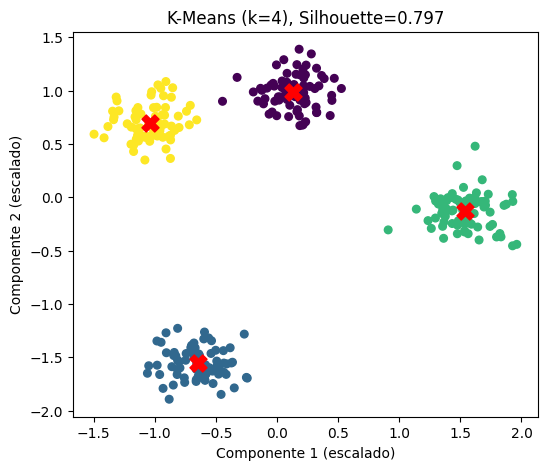

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Crear datos sintéticos para el ejemplo
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Usar k-means con inicialización k-means++

k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
sil_score = silhouette_score(X_scaled, labels)

print(f"Inercia (WCSS): {inertia:.2f}")
print(f"Silhouette score: {sil_score:.4f}")

# Visualización (datos escalados en 2D)
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, s=30)
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='X', s=150)
plt.title(f'K-Means (k={k}), Silhouette={sil_score:.3f}')
plt.xlabel('Componente 1 (escalado)')
plt.ylabel('Componente 2 (escalado)')
plt.show()


---

### **Notas:**

**Que son los centroides?**

En el contexto del algoritmo K-Means, los centroides son los puntos que representan el centro de cada cluster. Matemáticamente, un centroide es la media de todos los puntos de datos que han sido asignados a ese cluster particular.

Durante el algoritmo K-Means, los centroides se actualizan en cada iteración para ser la media de los puntos actualmente asignados a su cluster. El objetivo del algoritmo es encontrar la posición óptima de estos centroides para minimizar la suma del error cuadrático dentro de los clusters (WCSS).

A diferencia de los medoides (usados en K-Medoids), los centroides no tienen que ser necesariamente un punto de datos real del conjunto original; son simplemente el promedio de las coordenadas de los puntos asignados.


.


**Que es el metodo K-means++**

El método k-means++ es una estrategia de inicialización para el algoritmo K-Means. Su objetivo es seleccionar los centroides iniciales de una manera más inteligente que la selección completamente aleatoria.

La idea principal es que los centroides iniciales estén lo más separados posible entre sí. El algoritmo funciona de la siguiente manera:

1. Se elige un primer centroide al azar entre los puntos de datos.
Para cada punto de datos restante, se calcula la distancia al centroide más cercano que ya ha sido seleccionado.
2. Se elige el siguiente centroide de entre los puntos restantes con una probabilidad proporcional al cuadrado de su distancia al centroide más cercano ya seleccionado. Esto significa que los puntos que están más lejos de los centroides existentes tienen una mayor probabilidad de ser elegidos como el próximo centroide.
3. Se repiten los pasos 2 y 3 hasta que se hayan seleccionado los K centroides.
Este método ayuda a evitar que el algoritmo K-Means converja a soluciones subóptimas (óptimos locales) que pueden ocurrir con una inicialización completamente aleatoria, especialmente cuando los clusters están muy cerca unos de otros.

---


### **9. Recomendaciones de uso para K-Means**
- Usar cuando las variables son numéricas y los clusters tienden a ser convexos/esféricos.
- Aplicar escalado previo (StandardScaler o MinMaxScaler).
- Probar k-means++ y varias inicializaciones (n_init) para evitar soluciones locales pobres.
- Si hay outliers relevantes, considerar K-Medoids o técnicas de preprocesado (detección y eliminación de outliers).


---

## **K-Medoids**

### **1. Introducción y antecedentes**
K-Medoids surge como alternativa robusta a K-Means. En lugar de usar la media, selecciona como centro de cada cluster un elemento real del dataset (medoide). El método PAM (Partitioning Around Medoids) propuesto por Kaufman y Rousseeuw es la formulación clásica; existen variantes para grandes conjuntos (CLARA, CLARANS).

### **2. Formulación y objetivo**
Minimiza un criterio de disimilitud similar a K-Means, pero usando distancia absoluta entre puntos y medoides seleccionados:
\[
J_{medoids} = \sum_{k=1}^K \sum_{x_i \in C_k} d(x_i, m_k)
\]
donde \(m_k\) es un medoide (punto real) de \(C_k\) y \(d(\cdot, \cdot)\) es una medida de distancia (Manhattan, Euclidiana, otras).


### **3. Algoritmo PAM**
1. Inicialización: elegir K puntos como medoides.
2. Asignación: asignar cada punto al medoide más cercano.
3. Mejora: para cada medoide candidato no seleccionado, evaluar el intercambio entre un medoide y un punto no medoide; si el coste mejora, aceptar el intercambio.
4. Repetir hasta que no haya intercambios que mejoren la solución.


### **4. Variantes para grandes datos**
- **CLARA:** aplica PAM en subconjuntos muestrales repetidos y selecciona la mejor solución.
- **CLARANS:** búsqueda aleatorizada de swaps para eficiencias en tiempo.

### **5. Ventajas y limitaciones**
- Robusto frente a outliers y ruido, ya que usa puntos reales.
- Admite distintas métricas de distancia (no limitado a Euclidiana).
- Coste computacional mayor que K-Means (especialmente PAM: O(k(n-k)^2) en el peor caso).

### **6. Uso práctico**
- Recomendado cuando hay outliers o cuando las variables no se prestan a promediar (por ejemplo, datos categóricos codificados con distancias apropiadas).
- Para datasets muy grandes, usar CLARA o adaptar implementaciones aproximadas.



### **7. Ejemplo en Python**
Usaremos sklearn-extra para KMedoids (implementación eficiente) y compararemos con K-Means en presencia de un outlier extremo.

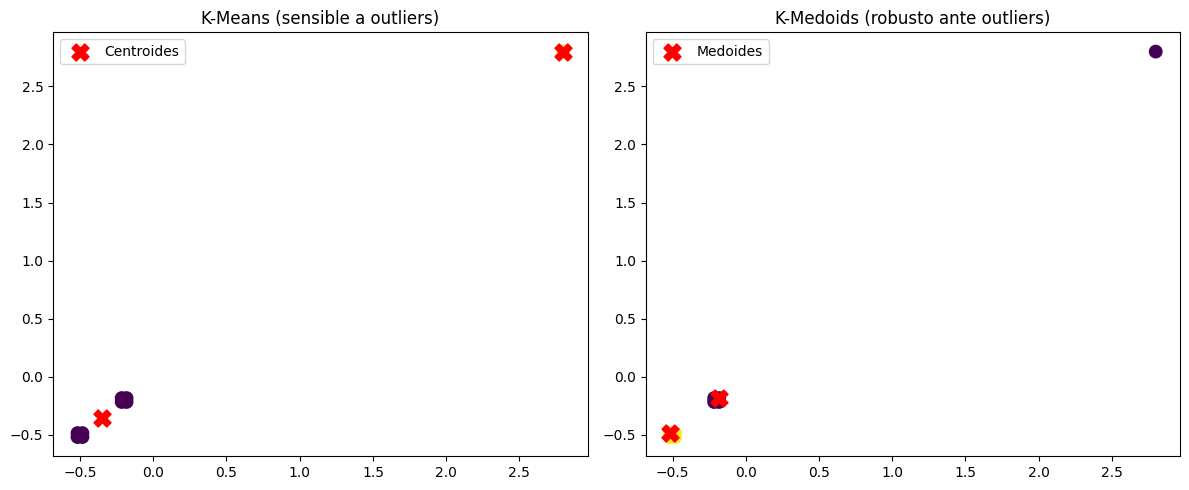

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min

# Implementación simple de K-Medoids sin dependencias externas

class SimpleKMedoids:
    def __init__(self, n_clusters=2, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = np.random.RandomState(random_state)

    def fit(self, X):
        m = X.shape[0]
        # Seleccionar índices aleatorios como medoids iniciales
        medoid_ids = self.random_state.choice(m, self.n_clusters, replace=False)
        self.medoids_ = X[medoid_ids]

        for _ in range(self.max_iter):
            # Asignar cada punto al medoid más cercano
            labels, _ = pairwise_distances_argmin_min(X, self.medoids_)
            new_medoids = np.copy(self.medoids_)

            for i in range(self.n_clusters):
                cluster_points = X[labels == i]
                if len(cluster_points) > 0:
                    # Calcular el punto más representativo (menor distancia total)
                    distances = np.sum(
                        np.linalg.norm(cluster_points[:, None] - cluster_points[None, :], axis=2),
                        axis=1
                    )
                    new_medoids[i] = cluster_points[np.argmin(distances)]

            # Detener si los medoids no cambian
            if np.allclose(self.medoids_, new_medoids):
                break
            self.medoids_ = new_medoids

        self.labels_, _ = pairwise_distances_argmin_min(X, self.medoids_)
        return self

# Datos con un outlier extremo

X = np.array([
    [1, 2], [2, 1], [1, 1], [2, 2],
    [10, 10], [11, 11], [10, 11], [11, 10],
    [100, 100]  # outlier extremo
])

# Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means

kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
labels_km = kmeans.fit_predict(X_scaled)

# K-Medoids

kmedoids = SimpleKMedoids(n_clusters=2, random_state=0)
kmedoids.fit(X_scaled)
labels_kmed = kmedoids.labels_

# Visualización comparativa

plt.figure(figsize=(12, 5))

# --- K-Means ---
plt.subplot(1, 2, 1)
plt.title('K-Means (sensible a outliers)')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_km, s=80, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=150, label='Centroides')
plt.legend()

# --- K-Medoids ---
plt.subplot(1, 2, 2)
plt.title('K-Medoids (robusto ante outliers)')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmed, s=80, cmap='viridis')
plt.scatter(kmedoids.medoids_[:, 0], kmedoids.medoids_[:, 1],
            c='red', marker='X', s=150, label='Medoides')
plt.legend()

plt.tight_layout()
plt.show()



### **8. Recomendaciones de uso para K-Medoids**
- Usar cuando se espera presencia de outliers o cuando se requiere una métrica de distancia no euclidiana.
- Para grandes volúmenes, evaluar CLARA o implementaciones que soporten muestreo.
- K-Medoids es más interpretables en el sentido de que el centro del cluster es un punto real del dataset.


---


## **DBSCAN**

DBSCAN fue propuesto por Ester, Kriegel, Sander y Xu en 1996. Es especialmente útil en datos espaciales y geoespaciales, aunque se aplica en muchos dominios por su capacidad de encontrar clusters de forma arbitraria y de identificar ruido explícitamente.



### **2. Fundamento y parámetros**
DBSCAN se basa en la noción de densidad local. Sus parámetros principales son:
- \(\epsilon\) (eps): radio de vecindad para considerar puntos vecinos.
- minPts: número mínimo de puntos dentro de la vecindad para considerar un punto como núcleo.

**Clasificación de puntos:**
- Punto núcleo: tiene al menos minPts puntos dentro de su vecindad eps.
- Punto frontera: no es núcleo, pero está dentro de la vecindad de un núcleo.
- Ruido: ni núcleo ni frontera.

### **3. Algoritmo/ Como funciona?**
1. Recorrer cada punto no visitado; buscar su vecindad eps.
2. Si la vecindad contiene al menos minPts, iniciar un nuevo cluster y expandir recursivamente incluyendo puntos alcanzables por densidad.
3. Si no, marcar como ruido (puede luego ser asignado como frontera si se descubre pertenencia por expansión de otro núcleo).

### **4. Selección de eps y minPts**
- minPts: regla práctica: minPts >= dimensionalidad + 1 o minPts >= 4.
- eps: suele estimarse mediante la curva de distancias k-ésimas (k-distance plot), buscando un "codo" (valor donde la pendiente cambia).

### **5. Ventajas y limitaciones**
- Identifica clusters con formas arbitrarias y maneja ruido.
- No requiere especificar K.
- Sensible a eps si las densidades varían; no funciona bien si hay clusters con densidades muy distintas.
- No escala tan bien para dimensiones muy altas (la noción de densidad se degrada por la maldición de la dimensionalidad).


### **6. Ejemplo en Python**
DBSCAN y la interpretación de etiquetas (-1 = ruido). También se ilustra cómo usar k-distance plot para elegir eps.

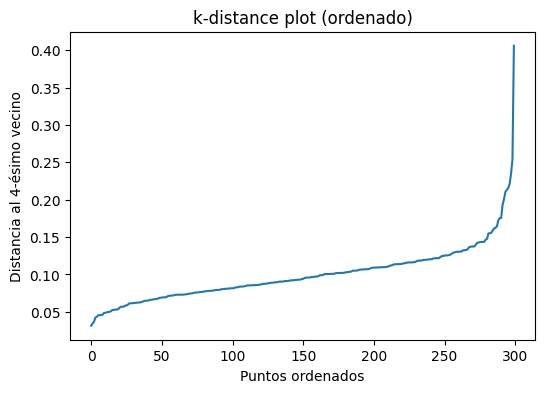

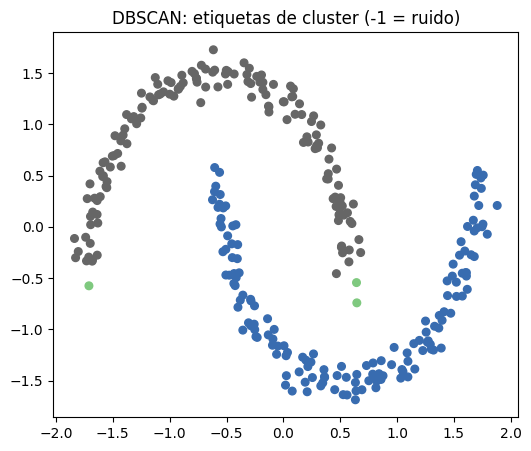

Puntos totales: 300, Ruido detectado: 3
Silhouette score: 0.2063927594956094
pairwise_distances(X_scaled, X_scaled):
[[0.         0.74056042 1.69537805 ... 2.66180788 2.82424354 1.36633381]
 [0.74056042 0.         1.418627   ... 1.93050789 2.34329629 0.68463498]
 [1.69537805 1.418627   0.         ... 1.98350643 1.22268181 1.09098226]
 ...
 [2.66180788 1.93050789 1.98350643 ... 0.         1.69313049 1.32357032]
 [2.82424354 2.34329629 1.22268181 ... 1.69313049 0.         1.7338663 ]
 [1.36633381 0.68463498 1.09098226 ... 1.32357032 1.7338663  0.        ]]


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_moons

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

# Datos en forma de media luna para mostrar clusters no esféricos
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)
X_scaled = StandardScaler().fit_transform(X)

# k-distance plot para estimar eps (k = min_samples - 1)

k = 4  # para min_samples = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
distances = np.sort(distances[:, k-1])
plt.figure(figsize=(6,4))
plt.plot(distances)
plt.title('k-distance plot (ordenado)')
plt.xlabel('Puntos ordenados')
plt.ylabel(f'Distancia al {k}-ésimo vecino')
plt.show()

# Aplicar DBSCAN con eps estimado (ajustar según el gráfico)
db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X_scaled)

# Visualización final
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='Accent', s=30)
plt.title('DBSCAN: etiquetas de cluster (-1 = ruido)')
plt.show()

# Mostrar proporción de ruido
n_noise = np.sum(labels == -1)
print(f"Puntos totales: {len(labels)}, Ruido detectado: {n_noise}")

print(f"Silhouette score: {silhouette_score(X_scaled, labels)}")
print("pairwise_distances(X_scaled, X_scaled):")
print(pairwise_distances(X_scaled, X_scaled))



### **7. Recomendaciones de uso para DBSCAN**
- DBSCAN es adecuado cuando se esperan clusters con formas no convexas y cuando el ruido es importante.
- Usar k-distance plot para elegir eps y experimentar con min_samples.
- En dimensiones altas, preferir reducción de dimensiones (PCA, UMAP) antes de aplicar DBSCAN.


---


## **Modelos de Mezcla Gaussiana (GMM)**

### **1. Introducción y contexto**
Los modelos de mezcla gaussiana representan una estrategia probabilística para el agrupamiento. Asumen que los datos se generan a partir de una mezcla de distribuciones gaussianas con parámetros desconocidos. Se utilizan ampliamente cuando se requiere un enfoque probabilístico o cuando los clusters pueden solaparse.


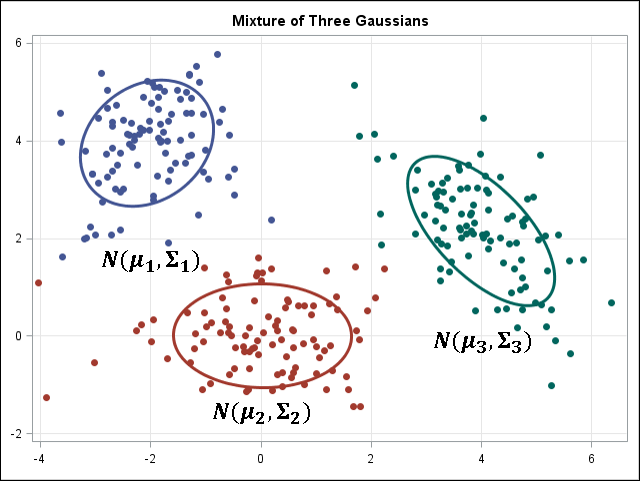

### **2. Tipos de covarianza y su impacto**
En sklearn se ofrecen varios tipos de covarianza: 'full', 'tied', 'diag', 'spherical'.
- 'full': cada componente tiene su matriz de covarianza completa (mayor flexibilidad, mayor número de parámetros).
- 'diag': covarianza diagonal (menos parámetros, asume independencia entre dimensiones para cada componente).
- 'spherical': varianza única por componente (componentes esféricos).
- 'tied': una única matriz de covarianza compartida por todas las componentes.



### **3. Ventajas y limitaciones**
- Permite solapamiento y asignaciones probabilísticas.
- Modela clusters elípticos y con diferentes tamaños y orientaciones si se usa 'full' covariance.
- Requiere número de componentes K y puede sufrir de convergencia a óptimos locales.
- Sensible a outliers y a la inicialización.

### **4. Evaluación y selección de K**
- Criterios de información como AIC (Akaike Information Criterion) y BIC (Bayesian Information Criterion) permiten comparar modelos con distinto K penalizando la complejidad del modelo.



### **5. Ejemplo en Python**
Ejemplo que muestra GMM con distintos tipos de covarianza y uso de BIC/AIC para seleccionar K.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Datos sintéticos con solapamiento
X, y_true = make_blobs(n_samples=400, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
X_scaled = StandardScaler().fit_transform(X)

# Probar distintos K y tipos de covarianza y calcular BIC/AIC
ks = range(1,7)
models = {}
bics = []
aics = []
for k in ks:
    gm = GaussianMixture(n_components=k, covariance_type='full', random_state=42, n_init=3)
    gm.fit(X_scaled)
    models[k] = gm
    bics.append(gm.bic(X_scaled))
    aics.append(gm.aic(X_scaled))

# Plot BIC/AIC
plt.figure(figsize=(6,4))
plt.plot(ks, bics, label='BIC', marker='o')
plt.plot(ks, aics, label='AIC', marker='o')
plt.xlabel('Número de componentes K')
plt.ylabel('Criterio')
plt.legend()
plt.title('Selección de K por BIC/AIC')
plt.show()

# Seleccionar modelo con menor BIC y visualizar asignaciones
best_k = ks[np.argmin(bics)]
best_gm = models[best_k]
labels = best_gm.predict(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, s=30)
plt.title(f'GMM seleccionado por BIC: K={best_k}')
plt.show()



## **Comparación y guía**

- **K-Means:** rápido, simple, asume clusters esféricos. Usar k-means++ y escalado previo. Evaluar K con elbow o silhouette.
- **K-Medoids:** robusto a outliers y adaptable a distintas métricas. Elegir para datos con ruido o cuando los centros deben ser observaciones reales.
- **DBSCAN:** no requiere K, detecta ruido y clusters de forma arbitraria; elegir eps con k-distance plot. Mejor para datos con densidad clara y baja dimensionalidad o tras reducción de dimensiones.
- **GMM:** enfoque probabilístico que permite solapamiento y clusters elípticos; usar BIC/AIC para seleccionar K.

### **Consejos:**

- Siempre explorar los datos con visualizaciones y estadísticas descriptivas antes de aplicar cualquier método.
- Normalizar o estandarizar features cuando corresponda.
- Probar múltiples métodos y comparar resultados de manera cuantitativa (silhouette, BIC/AIC) y cualitativa (visualización, interpretación de clusters).
- Considerar reducción de dimensionalidad para facilitar agrupamiento en datos con muchas características.